<a href="https://colab.research.google.com/github/venu72561-chinnam/AI-ML-project/blob/main/Cypher_like_graph_operations_using_NetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()

In [ ]:
# Function to simulate CREATE (Cypher-like)
def CREATE(node1, relation=None, node2=None):
    if relation and node2:
        G.add_node(node1)
        G.add_node(node2)
        G.add_edge(node1, node2, relation=relation)
    else:
        G.add_node(node1)

In [ ]:
# Function to simulate MATCH (like Cypher)
def MATCH(node=None, relation=None, target=None):
    results = []
    for u, v, d in G.edges(data=True):
        if (not node or node == u) and \
           (not relation or relation == d.get("relation")) and \
           (not target or target == v):
            results.append((u, d.get("relation"), v))
    return results

In [ ]:
def DELETE(node=None, relation=None, target=None):
    if node and not relation:
        if node in G:
            G.remove_node(node)
    elif node and relation and target:
        if G.has_edge(node, target):
            G.remove_edge(node, target)

In [ ]:
# Create initial graph (like CREATE in Cypher)
CREATE("Alice")
CREATE("Bob")
CREATE("LLM")
CREATE("Alice", "KNOWS", "Bob")
CREATE("Alice", "USES", "LLM")

In [ ]:
print(" Nodes:", list(G.nodes(data=True)))
print(" Relationships:", list(G.edges(data=True)))

 Nodes: [('Alice', {}), ('Bob', {}), ('LLM', {})]
 Relationships: [('Alice', 'Bob', {'relation': 'KNOWS'}), ('Alice', 'LLM', {'relation': 'USES'})]



🔹 MATCH (Alice)-[REL]->() =>
[('Alice', 'KNOWS', 'Bob'), ('Alice', 'USES', 'LLM')]

🔹 MATCH ()-[USES]->(LLM) =>
[('Alice', 'USES', 'LLM')]


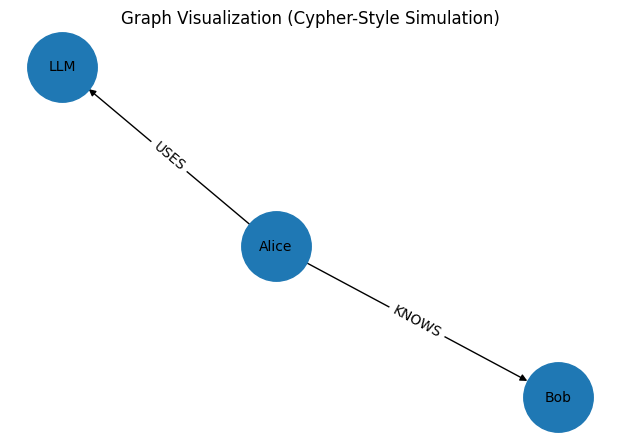

In [ ]:
print("\n🔹 MATCH (Alice)-[REL]->() =>")
print(MATCH(node="Alice"))

print("\n🔹 MATCH ()-[USES]->(LLM) =>")
print(MATCH(relation="USES", target="LLM"))

# Visualize
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2500, font_size=10)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Graph Visualization (Cypher-Style Simulation)")
plt.show()